# Topic Modeling for youth alcohol consumption - Bertopic

In [53]:
!pip install bertopic

Defaulting to user installation because normal site-packages is not writeable


In deze toepassing wordt topic modeling gebruikt om op een systematische wijze op zoek te gaan naar artikelen m.b.t. alcololgebruik bij jongeren en de bepalende factoren. 

In [70]:
# parameters
nr_of_articles = 10500 # max. 11000
startyear = 1991 
nr_topics = 11
min_topic_size = 25
ngram = 3

# hyperparameter tuning: https://maartengr.github.io/BERTopic/getting_started/parameter%20tuning/parametertuning.html

In [55]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

import numpy as np
import pandas as pd

pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)


## Data

Searchstring Web of Science: alcohol* AND (adolescen* OR youth OR minor OR underage*) AND (factors OR determinant* OR Cause* OR influence* OR Predictor*)
 
zoeken op Topic  (--> Searches title, abstract and author keywords.)

Dit geeft: n = 23.260 (artikels)

inclusie/exclusiecriteria
Refine: open acces (n=11.605)
Refine: english (n=11.260)
Refine: article + early acces (n = 10,436) --> alle andere bronnen geëxcludeerd op deze wijze

Sort by relevance. 


In [56]:
art1 = pd.read_excel('bertopic/savedrecs0001-1000.xls')
art2 = pd.read_excel('bertopic/savedrecs1001-2000.xls')
art3 = pd.read_excel('bertopic/savedrecs2001-3000.xls')
art4 = pd.read_excel('bertopic/savedrecs3001-4000.xls')
art5 = pd.read_excel('bertopic/savedrecs4001-5000.xls')
art6 = pd.read_excel('bertopic/savedrecs5001-6000.xls')
art7 = pd.read_excel('bertopic/savedrecs6001-7000.xls')
art8 = pd.read_excel('bertopic/savedrecs7001-8000.xls')
art9 = pd.read_excel('bertopic/savedrecs8001-9000.xls')
art10 = pd.read_excel('bertopic/savedrecs9001-10000.xls')
art11 = pd.read_excel('bertopic/savedrecs10001-10439.xls')

In [57]:
articles = pd.concat([art1, art2, art3, art4, art5, art6, art7, art8, art9, art10, art11], ignore_index=True, axis=0)

In [58]:
articles = articles.iloc[:nr_of_articles, :]

In [59]:
articles = articles[articles['Publication Year'] >= startyear]

In [60]:
len(articles)

10442

In [61]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10442 entries, 0 to 10441
Data columns (total 72 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Publication Type            10442 non-null  object 
 1   Authors                     10442 non-null  object 
 2   Book Authors                0 non-null      float64
 3   Book Editors                11 non-null     object 
 4   Book Group Authors          0 non-null      float64
 5   Author Full Names           10442 non-null  object 
 6   Book Author Full Names      0 non-null      float64
 7   Group Authors               161 non-null    object 
 8   Article Title               10442 non-null  object 
 9   Source Title                10442 non-null  object 
 10  Book Series Title           11 non-null     object 
 11  Book Series Subtitle        0 non-null      float64
 12  Language                    10442 non-null  object 
 13  Document Type               104

## Preprocessing

In [62]:
print(len(articles))
articles.drop_duplicates(subset=['Article Title', 'Abstract'], inplace=True)
print(len(articles))

10442
10435


In [63]:
art = articles
art.head()

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,Book Series Title,Book Series Subtitle,Language,Document Type,Conference Title,Conference Date,Conference Location,Conference Sponsor,Conference Host,Author Keywords,Keywords Plus,Abstract,Addresses,Affiliations,Reprint Addresses,Email Addresses,Researcher Ids,ORCIDs,Funding Orgs,Funding Name Preferred,Funding Text,Cited References,Cited Reference Count,"Times Cited, WoS Core","Times Cited, All Databases",180 Day Usage Count,Since 2013 Usage Count,Publisher,Publisher City,Publisher Address,ISSN,eISSN,ISBN,Journal Abbreviation,Journal ISO Abbreviation,Publication Date,Publication Year,Volume,Issue,Part Number,Supplement,Special Issue,Meeting Abstract,Start Page,End Page,Article Number,DOI,DOI Link,Book DOI,Early Access Date,Number of Pages,WoS Categories,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record
0,J,"Anderson, KG; Ramo, DE; Schulte, MT; Cummins, K; Brown, SA",NaN,NaN,NaN,"Anderson, Kristen G.; Ramo, Danielle E.; Schulte, Marya T.; Cummins, Kevin; Brown, Sandra A.",NaN,NaN,Substance use treatment outcomes for youth: Integrating personal and environmental predictors,DRUG AND ALCOHOL DEPENDENCE,NaN,NaN,English,Article,NaN,NaN,NaN,NaN,NaN,substance use; treatment; adolescents,DIAGNOSTIC INTERVIEW SCHEDULE; DRUG-ABUSE TREATMENT; ADOLESCENT ALCOHOL; MULTIPLE IMPUTATION; PSYCHIATRIC-DISORDERS; RATING-SCALE; RELIABILITY; EXPECTANCY; DRINKING; DEPENDENCE,"This investigation examined personal and environmental predictors of substance treatment outcomes in youth. A 424 adolescents (M=15.9 years, S.D. = 1.3) completed comprehensive assessments, including substance use, environmental factors (e.g., family history, social supports), and person-centered variables (e.g., Axis I diagnosis, motivation, self-esteem), at study intake and throughout the year following inpatient treatment. Youth treatment outcomes were assessed by relapse status (abstaining, minor relapse, major relapse) and DSM-IV dependence symptoms at 1 year. Relapse status was predicted by demographic (age), environmental (social supports), and person-centered factors (diagnosis) while dependence symptoms were best predicted by substance use variables alone. Consideration of the general and specific nature of risk and protection within the adolescent developmental context were explored. (c) 2006 Published by Elsevier Ireland Ltd.","Univ Calif San Diego, Vet Affairs San Diego Healthcare Syst, San Diego, CA 92093 USA; Univ Calif San Diego, Dept Psychiat & Psychol, San Diego, CA 92093 USA; Univ Calif San Diego, SDSU, Joint Doctoral Program Clin Psychol, San Diego, CA 92093 USA; Univ Calif San Diego, Dept Psychol, San Diego, CA 92093 USA",US Department of Veterans Affairs; Veterans Health Administration (VHA); VA San Diego Healthcare System; University of California System; University of California San Diego; University of California System; University of California San Diego; University of California System; University of California San Diego; California State University System; San Diego State University; University of California System; University of California San Diego,"Brown, SA (corresponding author), Univ Calif San Diego, Vet Affairs San Diego Healthcare Syst, 9500 Gilman Dr MC 0109, San Diego, CA 92093 USA.",sanbrown@ucsd.edu,"Brown, Sandra A/S-8789-2019","Anderson, Kristen/0000-0002-3930-1324",NaN,NaN,NaN,NaN,52,36,47,1,14,ELSEVIER IRELAND LTD,CLARE,"ELSEVIER HOUSE, BROOKVALE PLAZA, EAST PARK SHANNON, CO, CLARE, 00000, IRELAND",0376-8716,1879-0046,NaN,DRUG ALCOHOL DEPEN,Drug Alcohol Depend.,APR 17,2007,88.0,1,NaN,NaN,NaN,NaN,42,48,NaN,10.1016/j.drugalcdep.2006.09.014,0.0,NaN,NaN,7,Substance Abuse; Psychiatry,Science Citation Index Expanded (SCI-EXPANDED); Social Science Citation Index (SSCI),

In [64]:
art['text'] = art['Article Title'].fillna('') + ' ' + art['Abstract'].fillna('')
art.head(2)


,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,Book Series Title,Book Series Subtitle,Language,Document Type,Conference Title,Conference Date,Conference Location,Conference Sponsor,Conference Host,Author Keywords,Keywords Plus,Abstract,Addresses,Affiliations,Reprint Addresses,Email Addresses,Researcher Ids,ORCIDs,Funding Orgs,Funding Name Preferred,Funding Text,Cited References,Cited Reference Count,"Times Cited, WoS Core","Times Cited, All Databases",180 Day Usage Count,Since 2013 Usage Count,Publisher,Publisher City,Publisher Address,ISSN,eISSN,ISBN,Journal Abbreviation,Journal ISO Abbreviation,Publication Date,Publication Year,Volume,Issue,Part Number,Supplement,Special Issue,Meeting Abstract,Start Page,End Page,Article Number,DOI,DOI Link,Book DOI,Early Access Date,Number of Pages,WoS Categories,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record,text
0,J,"Anderson, KG; Ramo, DE; Schulte, MT; Cummins, K; Brown, SA",NaN,NaN,NaN,"Anderson, Kristen G.; Ramo, Danielle E.; Schulte, Marya T.; Cummins, Kevin; Brown, Sandra A.",NaN,NaN,Substance use treatment outcomes for youth: Integrating personal and environmental predictors,DRUG AND ALCOHOL DEPENDENCE,NaN,NaN,English,Article,NaN,NaN,NaN,NaN,NaN,substance use; treatment; adolescents,DIAGNOSTIC INTERVIEW SCHEDULE; DRUG-ABUSE TREATMENT; ADOLESCENT ALCOHOL; MULTIPLE IMPUTATION; PSYCHIATRIC-DISORDERS; RATING-SCALE; RELIABILITY; EXPECTANCY; DRINKING; DEPENDENCE,"This investigation examined personal and environmental predictors of substance treatment outcomes in youth. A 424 adolescents (M=15.9 years, S.D. = 1.3) completed comprehensive assessments, including substance use, environmental factors (e.g., family history, social supports), and person-centered variables (e.g., Axis I diagnosis, motivation, self-esteem), at study intake and throughout the year following inpatient treatment. Youth treatment outcomes were assessed by relapse status (abstaining, minor relapse, major relapse) and DSM-IV dependence symptoms at 1 year. Relapse status was predicted by demographic (age), environmental (social supports), and person-centered factors (diagnosis) while dependence symptoms were best predicted by substance use variables alone. Consideration of the general and specific nature of risk and protection within the adolescent developmental context were explored. (c) 2006 Published by Elsevier Ireland Ltd.","Univ Calif San Diego, Vet Affairs San Diego Healthcare Syst, San Diego, CA 92093 USA; Univ Calif San Diego, Dept Psychiat & Psychol, San Diego, CA 92093 USA; Univ Calif San Diego, SDSU, Joint Doctoral Program Clin Psychol, San Diego, CA 92093 USA; Univ Calif San Diego, Dept Psychol, San Diego, CA 92093 USA",US Department of Veterans Affairs; Veterans Health Administration (VHA); VA San Diego Healthcare System; University of California System; University of California San Diego; University of California System; University of California San Diego; University of California System; University of California San Diego; California State University System; San Diego State University; University of California System; University of California San Diego,"Brown, SA (corresponding author), Univ Calif San Diego, Vet Affairs San Diego Healthcare Syst, 9500 Gilman Dr MC 0109, San Diego, CA 92093 USA.",sanbrown@ucsd.edu,"Brown, Sandra A/S-8789-2019","Anderson, Kristen/0000-0002-3930-1324",NaN,NaN,NaN,NaN,52,36,47,1,14,ELSEVIER IRELAND LTD,CLARE,"ELSEVIER HOUSE, BROOKVALE PLAZA, EAST PARK SHANNON, CO, CLARE, 00000, IRELAND",0376-8716,1879-0046,NaN,DRUG ALCOHOL DEPEN,Drug Alcohol Depend.,APR 17,2007,88.0,1,NaN,NaN,NaN,NaN,42,48,NaN,10.1016/j.drugalcdep.2006.09.014,0.0,NaN,NaN,7,Substance Abuse; Psychiatry,Science Citation Index Expanded (SCI-EXPANDED); Social Science Citation Index (S

In [65]:
# Lemmatization
import nltk
import string
nltk.download('stopwords')
from nltk.tokenize import word_tokenize 
nltk.download('all')   # download wordlist
from nltk.stem import WordNetLemmatizer
english_stopwords = set(nltk.corpus.stopwords.words('english'))
punctuation = set(string.punctuation)

art['text'] = art['text'].str.replace(r'\b\w{1,3}\b', '') # remove words with less than 3 characters
art['text'] = art['text'].str.replace(r'\d+', '') # remove numbers


lemmatizer = WordNetLemmatizer() 
# tgw = ['alcohol','substance','youth','adolescent','factor','factors','among']  # topic general words to be excluded
tgw = ['alcohol','among']  # topic general words to be excluded

def lemmatizing_en(text):
    word_tokens = word_tokenize(text.lower()) 
    word_tokens = [word for word in word_tokens if word not in punctuation]
    word_tokens = [word for word in word_tokens if word.isalpha()]
    word_tokens = [word for word in word_tokens if word not in english_stopwords]
    word_tokens = [word for word in word_tokens if word not in tgw]
    result = [lemmatizer.lemmatize(x) for x in word_tokens]
    seperator = ' '
    return seperator.join(result)  # return list and string

art['text'] = [lemmatizing_en(s) for s in art['text']]

for word in tgw:
    art['text'] = art['text'].str.replace(word, '') # remove tgw words

art['text'] = art['text'].str.replace(r'\b\w{1,3}\b', '') # remove lemmas with less than 3 characters


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jcor864\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\jcor864\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\jcor864\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\jcor864\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\jcor864\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nl

In [66]:
art['text'].iloc[0]

'substance treatment outcome youth integrating personal environmental predictor investigation examined personal environmental predictor substance treatment outcome youth adolescent year completed comprehensive assessment including substance environmental factor family history social support variable axis diagnosis motivation study intake throughout year following inpatient treatment youth treatment outcome assessed relapse status abstaining minor relapse major relapse dependence symptom year relapse status predicted demographic environmental social support factor diagnosis dependence symptom best predicted substance variable alone consideration general specific nature risk protection within adolescent developmental context explored published elsevier ireland'

## Bertopic

In [67]:
art.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10435 entries, 0 to 10441
Data columns (total 73 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Publication Type            10435 non-null  object 
 1   Authors                     10435 non-null  object 
 2   Book Authors                0 non-null      float64
 3   Book Editors                11 non-null     object 
 4   Book Group Authors          0 non-null      float64
 5   Author Full Names           10435 non-null  object 
 6   Book Author Full Names      0 non-null      float64
 7   Group Authors               161 non-null    object 
 8   Article Title               10435 non-null  object 
 9   Source Title                10435 non-null  object 
 10  Book Series Title           11 non-null     object 
 11  Book Series Subtitle        0 non-null      float64
 12  Language                    10435 non-null  object 
 13  Document Type               104

In [69]:

from bertopic import BERTopic

# Fine-tune your topic representations
# from bertopic.representation import KeyBERTInspired
# representation_model = KeyBERTInspired()
# topic_model = BERTopic(representation_model=representation_model)

# Prepare embeddings
# sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
# embeddings = sentence_model.encode(art['text'], show_progress_bar=False)

topic_model = BERTopic(nr_topics=nr_topics, min_topic_size=min_topic_size,verbose=True)
topics, probs = topic_model.fit_transform(art['text'])

# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer_model = CountVectorizer(ngram_range=(1, 3), stop_words="english")
# topic_model.update_topics(docs, vectorizer_model=vectorizer_model)

# Reduce dimensionality of embeddings, this step is optional
# reduced_embeddings = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)

# Or, if you have reduced the original embeddings already:
# topic_model.visualize_documents(docs, reduced_embeddings=reduced_embeddings)

2024-04-26 09:08:09,223 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/327 [00:00<?, ?it/s]

2024-04-26 09:13:34,518 - BERTopic - Embedding - Completed ✓
2024-04-26 09:13:34,519 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-04-26 09:13:39,868 - BERTopic - Dimensionality - Completed ✓
2024-04-26 09:13:39,870 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-04-26 09:13:40,280 - BERTopic - Cluster - Completed ✓
2024-04-26 09:13:40,282 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-04-26 09:13:41,854 - BERTopic - Representation - Completed ✓
2024-04-26 09:13:41,857 - BERTopic - Topic reduction - Reducing number of topics
2024-04-26 09:13:43,451 - BERTopic - Topic reduction - Reduced number of topics from 55 to 11


In [68]:
opt_nr_of_topics = len(set(topics))
opt_nr_of_topics

11

In [71]:
# optional
if ngram > 1:
    from sklearn.feature_extraction.text import CountVectorizer
    vectorizer_model = CountVectorizer(ngram_range=(1, ngram), stop_words="english", min_df=8)  # min_df is  an integer representing how frequent a word must be before being added to the representation.
    topic_model.update_topics(art['text'], vectorizer_model=vectorizer_model)



In [73]:
# topic information
for i in range(0, nr_topics-1):
    print(f"Topic {i}")
    for j in range(0,10):
        word = topic_model.get_topic(i)[j][0]
        print(f'{word.ljust(20, " ")} \t {round(topic_model.get_topic(i)[j][1],4)}')
    print('')


Topic 0
drinking             	 0.0374
adolescent           	 0.033
study                	 0.0285
sexual               	 0.026
factor               	 0.0251
risk                 	 0.025
associated           	 0.0219
behavior             	 0.0214
substance            	 0.0198
student              	 0.0197

Topic 1
smoking              	 0.0456
ethanol              	 0.0367
cannabis             	 0.0347
adolescent           	 0.0344
tobacco              	 0.0256
effect               	 0.0254
study                	 0.0248
adult                	 0.0235
cigarette            	 0.0219
marijuana            	 0.0214

Topic 2
health               	 0.0448
risk                 	 0.0378
physical             	 0.0351
factor               	 0.0332
study                	 0.0319
physical activity    	 0.0316
adolescent           	 0.031
activity             	 0.0291
lifestyle            	 0.0271
cancer               	 0.0268

Topic 3
disease              	 0.072
patient              	 0.0544
child     

In [74]:
topic_model.visualize_barchart(top_n_topics=10, n_words=10,width=500, height=500)

In [75]:
topic_model.visualize_topics()

In [76]:
tm = topic_model.get_topic_info()[['Topic', 'Count', 'Name','Representation']]
tm

,Topic,Count,Name,Representation
0,-1,3549,-1_substance_adolescent_study_risk,"[substance, adolescent, study, risk, factor, health, drug, youth, associated, behavior]"
1,0,3424,0_drinking_adolescent_study_sexual,"[drinking, adolescent, study, sexual, factor, risk, associated, behavior, substance, student]"
2,1,1661,1_smoking_ethanol_cannabis_adolescent,"[smoking, ethanol, cannabis, adolescent, tobacco, effect, study, adult, cigarette, marijuana]"
3,2,598,2_health_risk_physical_factor,"[health, risk, physical, factor, study, physical activity, adolescent, activity, lifestyle, cancer]"
4,3,342,3_disease_patient_child_obesity,"[disease, patient, child, obesity, risk, associated, study, level, group, serum]"
5,4,263,4_internet_adolescent_problem_study,"[internet, adolescent, problem, study, exposure, student, associated, online, factor, game]"
6,5,180,5_driving_injury_sport_participation,"[driving, injury, sport, participation, risk, adolescent, study, vehicle, factor, year]"
7,6,153,6_minor_compound_composition_production,"[minor, compound, composition, production, concentration, different, chemical, component, product, content]"
8,7,122,7_exposure_child_brain_volume,"[exposure, child, brain, volume, pregnancy, control, maternal, study, cocaine, effect]"
9,8,89,8_sleep_duration_quality_problem,"[sleep, duration, quality, problem, study, health, adolescent, associated, student, factor]"


In [39]:
tm.to_excel('../topics.xlsx', index=False)

In [40]:
# Run the visualization with the original embeddings
# topic_model.visualize_documents(art['text'], embeddings=embeddings)

In [41]:
topic_model.visualize_heatmap()

## Attaching Discovered Topic Labels to Original Articles

In [42]:
art['Topic'] = topics
art['Prob'] = probs
# art = art[(art['Topic'] >= 0)]   # -1 refers to all outliers and should typically be ignored. 
articles = art.drop(columns=['text'])

In [43]:
articles[articles['Topic'] == 1][['Article Title','Abstract']][:10]

,Article Title,Abstract
6,"Genetic, psychosocial, and demographic factors associated with social disinhibition in Mexican-origin youth","Introduction: The genetic heritability for sensation-seeking tendencies ranges from 40 to 60%. Sensation-seeking behaviors typically manifest during adolescence and are associated with alcohol and cigarette experimentation in adolescents. Social disinhibition is an aspect of sensation-seeking that is closely tied to cigarette and alcohol experimentation. Methods: We examined the contribution of candidate genes to social disinhibition among 1132 Mexican origin youth in Houston, Texas, adjusting for established demographic and psychosocial risk factors. Saliva samples were obtained at baseline in 2005-06, and social disinhibition and other psychosocial data were obtained in 2008-09. Participants were genotyped for 672 functional and tagging SNPs potentially related to sensation-seeking, risk-taking, smoking, and alcohol use. Results: Six SNPs were significantly associated with social disinhibition scores, after controlling for false discovery and adjusting for population stratification and relevant demographic/psychosocial characteristics. Minor alleles for three of the SNPs (rs1998220 on OPRM1; rs9534511 on HTR2A; and rs4938056 on HTR3B) were associated with increased risk of social disinhibition, while minor alleles for the other three SNPs (rs1003921 on KCNC1; rs16116 downstream of NPY; and rs16870286 on LINC00518) exhibited a protective effect. Age, linguistic acculturation, thrill and adventure-seeking, and drug and alcohol-seeking were all significantly positively associated with increased risk of social disinhibition in a multivariable model (P < 0.001). Conclusions: These results add to our knowledge of genetic risk factors for social disinhibition. Additional research is needed to verify whether these SNPs are associated with social disinhibition among youth of different ethnicities and nationalities, and to elucidate whether and how these SNPs functionally contribute to social disinhibition."
12,Individual and social determinants of multiple chronic disease behavioral risk factors among youth,"Background: Behavioral risk factors are known to co-occur among youth, and to increase risks of chronic diseases morbidity and mortality later in life. However, little is known about determinants of multiple chronic disease behavioral risk factors, particularly among youth. Previous studies have been cross-sectional and carried out without a sound theoretical framework. Methods: Using longitudinal data (n = 1135) from Cycle 4 (2000-2001), Cycle 5 (2002-2003) and Cycle 6 (2004-2005) of the National Longitudinal Survey of Children and Youth, a nationally representative sample of Canadian children who are followed biennially, the present study examines the influence of a set of conceptually-related individual/social distal variables (variables situated at an intermediate distance from behaviors), and individual/social ultimate variables (variables situated at an utmost distance from behaviors) on the rate of occurrence of multiple behavioral risk factors (physical inactivity, sedentary behavior, tobacco smoking, alcohol drinking, and high body mass index) in a sample of children aged 10-11 years at baseline. Multiple behavioral risk factors were assessed using a multiple risk factor score. All statistical analyses were performed using SAS, version 9.1, and SUDAAN, version 9.01. Results: Multivariate longitudinal Poisson models showed that social distal variables including parental/peer smoking and peer drinking (Log-likelihood ratio (LLR) = 187.86, degrees of freedom (DF) = 8, p < .001), as well as individual distal variables including low self-esteem (LLR = 76.94, DF = 4, p < .001) increased the rate of occurrence of multiple behavioral risk factors. Individual ultimate variables including age, sex, and anxiety (LLR = 9.34, DF = 3, p < .05), as well as social ultimate variables including family so

## Number of articles per topic and per year

In [44]:
# pivot table year x topic --> count

pvt = pd.pivot_table(articles, columns="Topic", index="Publication Year", values='Abstract',aggfunc='count', margins=True).fillna(0).astype(int)
pvt

Topic,-1,0,1,2,3,4,5,6,7,8,9,All
Publication Year,,,,,,,,,,,,
1991,2,1,1,0,2,0,0,0,0,0,0,6
1992,2,3,1,2,1,0,0,0,0,0,1,10
1993,5,4,1,2,0,0,0,0,0,0,0,12
1994,4,4,1,1,1,0,0,0,0,1,0,12
1995,9,3,2,0,0,0,0,0,0,0,0,14
1996,6,4,3,0,1,1,0,0,0,0,0,15
1997,8,13,7,1,1,0,0,0,0,0,1,31
1998,9,11,8,3,2,0,0,1,0,0,0,34
1999,10,8,7,2,0,2,1,2,0,0,0,32


In [45]:
pvt.to_excel('../pvt.xlsx')

### Time trends

In [46]:
pvt1 = pvt.reset_index()
pvt2 = pvt1.copy()

pvt1 = pvt1.drop('All',axis=1)
# pvt1 = pvt1[(pvt1['Publication Year'] != 2024)]
pvt1 = pvt1[:-1]
pvt1

Topic,Publication Year,-1,0,1,2,3,4,5,6,7,8,9
0,1991,2,1,1,0,2,0,0,0,0,0,0
1,1992,2,3,1,2,1,0,0,0,0,0,1
2,1993,5,4,1,2,0,0,0,0,0,0,0
3,1994,4,4,1,1,1,0,0,0,0,1,0
4,1995,9,3,2,0,0,0,0,0,0,0,0
5,1996,6,4,3,0,1,1,0,0,0,0,0
6,1997,8,13,7,1,1,0,0,0,0,0,1
7,1998,9,11,8,3,2,0,0,1,0,0,0
8,1999,10,8,7,2,0,2,1,2,0,0,0
9,2000,14,14,5,1,0,1,0,0,0,0,3


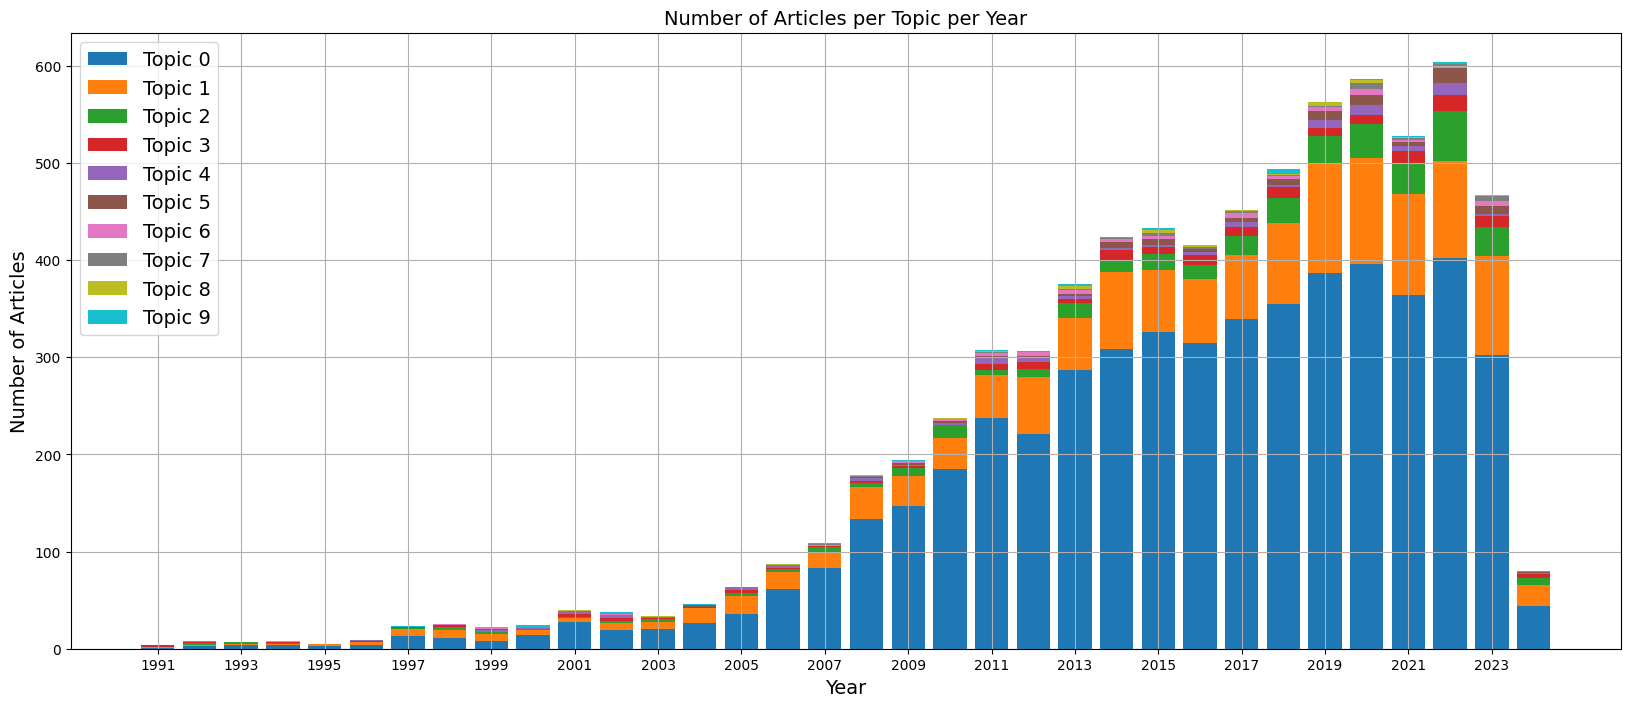

In [47]:
from matplotlib import pyplot as plt
# set figure size as 8 x 20 inches
plt.figure(figsize=(20,8))
bottom = np.zeros(34)
for i in range(0, nr_topics-1):
    plt.bar(pvt1['Publication Year'], pvt1[i], bottom = bottom, label=f'Topic {i}')
    bottom += pvt1[i]

plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.title('Number of Articles per Topic per Year')
# set ticks on x as years
plt.xticks(np.arange(pvt1['Publication Year'].min(), pvt1['Publication Year'].max()+1, 2))
plt.legend()
plt.grid()
plt.show()

In [48]:
pvt2['All'] = pvt2['All'] - pvt2[-1]

for i in range(0, nr_topics-1):
    pvt2[i] = pvt2[i] / pvt2['All']

pvt2 = pvt2.drop('All',axis=1)
# pvt2 = pvt2[(pvt2['Publication Year'] != 2024)]
pvt2 = pvt2[:-1]
pvt2



Topic,Publication Year,-1,0,1,2,3,4,5,6,7,8,9
0,1991,2,0.250000,0.250000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1992,2,0.375000,0.125000,0.250000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000
2,1993,5,0.571429,0.142857,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1994,4,0.500000,0.125000,0.125000,0.125000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000
4,1995,9,0.600000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,1996,6,0.444444,0.333333,0.000000,0.111111,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000
6,1997,8,0.565217,0.304348,0.043478,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478
7,1998,9,0.440000,0.320000,0.120000,0.080000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000
8,1999,10,0.363636,0.318182,0.090909,0.000000,0.090909,0.045455,0.090909,0.000000,0.000000,0.000000
9,2000,14,0.583333,0.208333,0.041667,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.125000


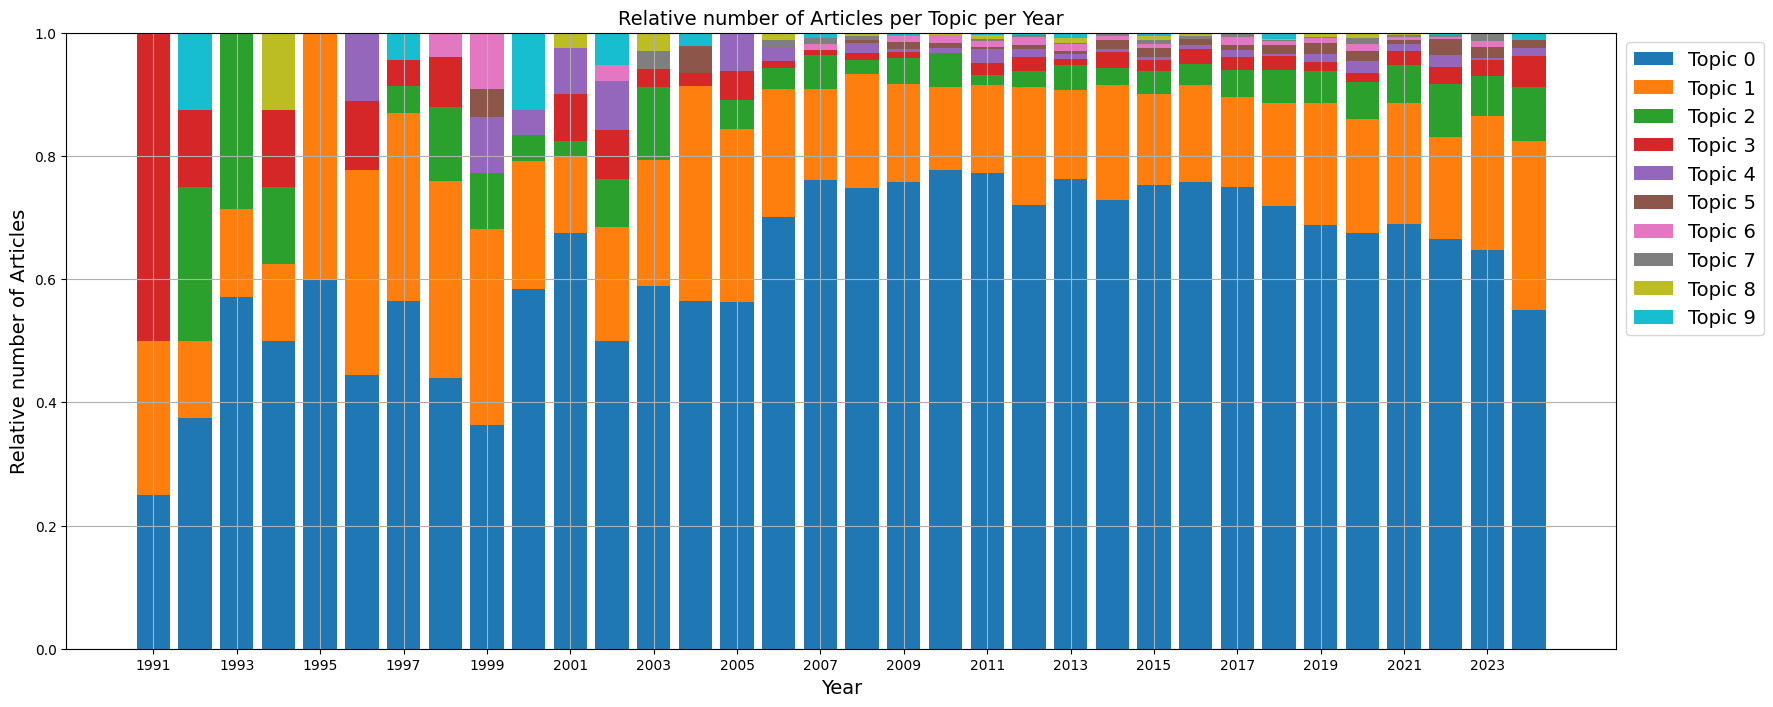

In [49]:
from matplotlib import pyplot as plt
# set figure size as 8 x 20 inches
plt.figure(figsize=(20,8))

bottom = np.zeros(34)
for i in range(0, opt_nr_of_topics-1):
    plt.bar(pvt2['Publication Year'], pvt2[i], bottom=bottom, label=f'Topic {i}')
    bottom += pvt2[i]

plt.xlabel('Year')
plt.ylabel('Relative number of Articles')
plt.title('Relative number of Articles per Topic per Year')
# set ticks on x as years
plt.xticks(np.arange(pvt2['Publication Year'].min(), pvt2['Publication Year'].max()+1, 2))
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.grid()
plt.show()

In [50]:
art.to_excel('art_year_topic.xlsx',index=False)

DONE
- check if full text can be downloaded via API -> nuttig?  NEEN
- "> 1000 artikelen? JA
- beginjaar  : 1991
- uitsluiten van "topic general words": JA
- Bertopic
- score per woord (cf. barchart)
- probability scores toekennen aan elk artikel
- relatieve grafiek
- behoud van alle data uit WoS

TODO
- bepaling kwaliteit clusters
  - artikel
  - https://github.com/MaartenGr/BERTopic/issues/437
- fine-tunen, o.a. optimale aantal topics




#### References

- LDA gensim vs scikit-learn: https://blog.devgenius.io/working-with-sklearn-latent-dirichlet-allocation-lda-topic-modeling-on-airline-sentiment-twitter-56dfacfd58bf  - 
- Perplexity score: https://medium.com/@iqra.bismi/topic-modelling-using-lda-fe81a2a806e0#:~:text=Perplexity%20is%20a%20commonly%20used,score%20indicates%20better%20model%20performance
- A Topic Modeling Comparison Between LDA, NMF, Top2Vec, and BERTopic to Demystify Twitter Posts: https://www.frontiersin.org/articles/10.3389/fsoc.2022.886498/full
- https://towardsdatascience.com/visualizing-topic-models-with-scatterpies-and-t-sne-f21f228f7b02
- https://maartengr.github.io/BERTopic/index.html 